# Dispersion y caida de ceniza. Ecuacion de transporte adveccion-difusion 2D

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
import matplotlib.pyplot as plt

In [2]:
# Definir la ecuación diferencial parcial de advección-difusión para tefra en dos dimensiones
def advection_diffusion(c, x, y, u_x, u_y, D_xx, D_yy):
    # Calcula las primeras derivadas
    c_x, c_y = tf.gradients(c, [x, y])
    # Calcula las segundas derivadas
    c_xx, c_yy = tf.gradients(c_x, x)[0], tf.gradients(c_y, y)[0]
    # Ecuación de advección-difusión
    return -u_x * c_x - u_y * c_y + D_xx * c_xx + D_yy * c_yy

# Condiciones iniciales y de borde
def initial_condition(x, y):
    return tf.exp(-0.1 * (x**2 + y**2))

def boundary_condition(x, y):
    return 0

In [3]:
# Generar puntos de datos para x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
X_flatten, Y_flatten = X.flatten(), Y.flatten()

# Parámetros de advección y difusión
u_x, u_y = 1.0, 0.1 #idk si estos valores son sinteticos o de paper
D_xx, D_yy = 0.05, 0.05

In [4]:
# Preparar los datos de entrenamiento
inputs = np.stack([X_flatten, Y_flatten], axis=-1)
targets = initial_condition(X_flatten, Y_flatten).numpy()

# Modelo de red neuronal
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(2,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

c:\Users\djara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Entrenamiento de la red neuronal
model.fit(inputs, targets, epochs=500, verbose=1)

Epoch 1/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - loss: 0.0608
Epoch 2/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 1.1062e-04
Epoch 3/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 4.4208e-05
Epoch 4/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 1.0848e-04
Epoch 5/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 4.3324e-05
Epoch 6/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1.0101e-04
Epoch 7/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 7.8127e-05
Epoch 8/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 2.8203e-05
Epoch 9/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 1.0364e-04
Epoch 10/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 2.8390e-05
Epoch 11/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 6.7429e-05
Epoch 12/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 1.9945e-04
Epoch 13/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 1.7177e-05
Epoch 14/500
313/313 ━━━━━━━━━━━━━━━━━

In [6]:
# Predicción con la red entrenada
predictions = model.predict(inputs).reshape(X.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step


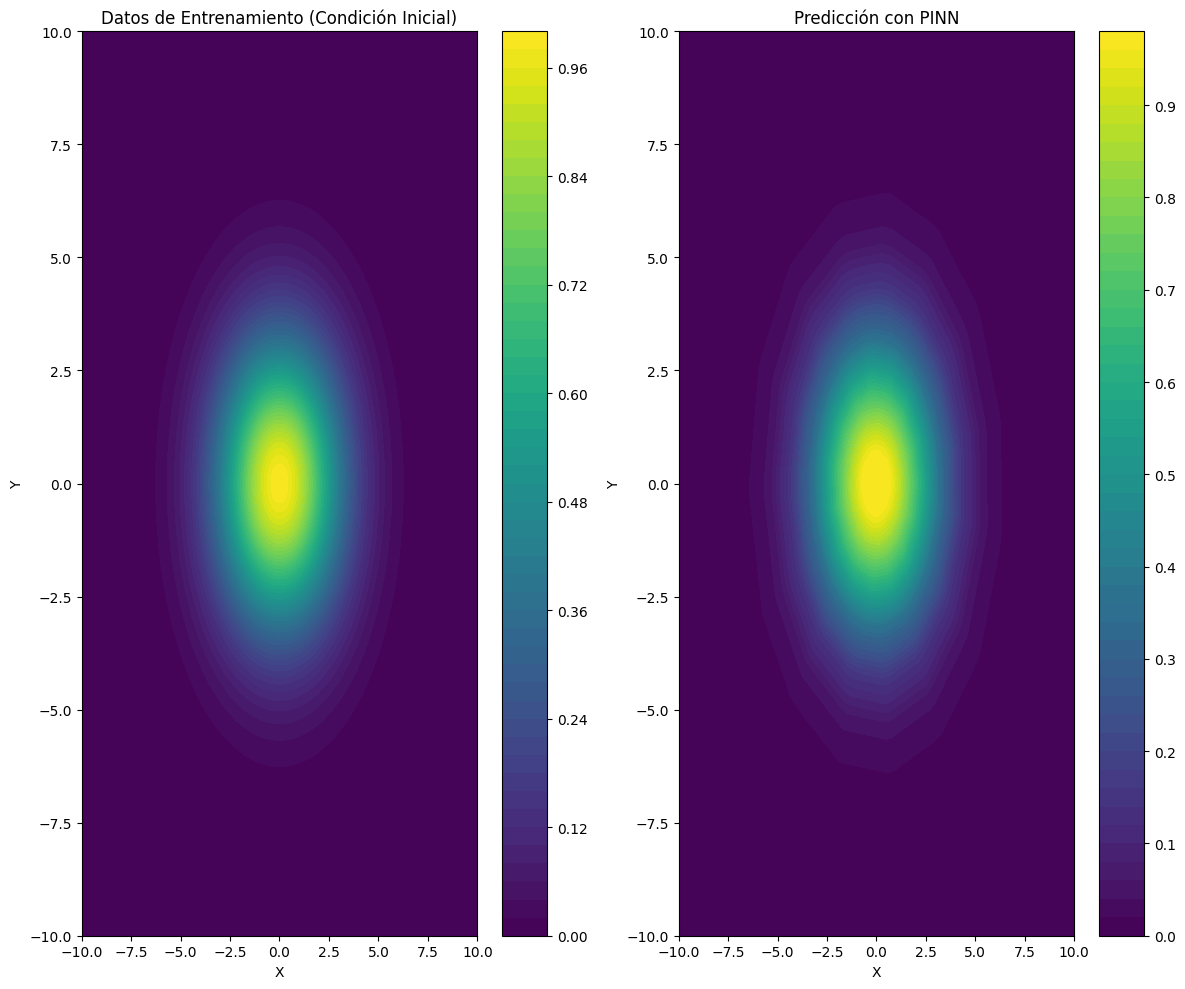

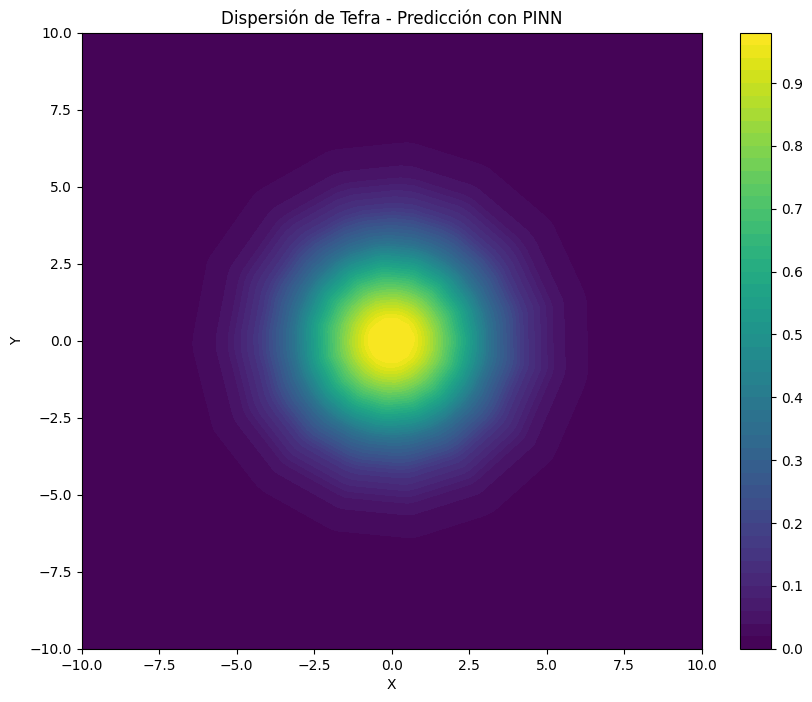

In [7]:
# Visualización de resultados
plt.figure(figsize=(12, 10))

# Gráfico de datos de entrenamiento (Condición inicial)
plt.subplot(1, 2, 1)
plt.contourf(X, Y, targets.reshape(X.shape), levels=50, cmap='viridis')
plt.colorbar()
plt.title('Datos de Entrenamiento (Condición Inicial)')
plt.xlabel('X')
plt.ylabel('Y')

# Gráfico de predicción con PINN
plt.subplot(1, 2, 2)
plt.contourf(X, Y, predictions, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Predicción con PINN')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, predictions, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Dispersión de Tefra - Predicción con PINN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
